In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import json
import collections
import scholarly
from itertools import product
import nltk
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_md')

# Parse our data into CSV file

In [2]:
def generate_citation_count(citation_dict, df):
    citation_list = zerolistmaker(df.shape[0])
    for key in citation_dict:
        citation_list[int(key)] = citation_dict[key]
    return citation_list

In [3]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

In [4]:
def parse_data_into_dataframe(filename):
    row = []
    df = pd.DataFrame()
    refCount = 0
    title = None
    authors = None
    year = None
    publication_venue = None
    index = None
    abstract = None

    citation_dict = {}

    with open(filename) as file:
        content = {}
        for line in file:
            if(len(line) > 2):
                #* --- paperTitle
                #@ --- Authors
                #t ---- Year
                #c  --- publication venue
                #index 00---- index id of this paper
                #% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
                #! --- Abstract
                value = line[2:-1]
                if(line[1] =='*'):
                    title = value
                elif(line[1] =='@'):
                    authors = value 
                elif(line[1] == 't'):
                    year = value
                elif(line[1] =='c'):
                    publication_venue = value
                elif(line[1] =='i'):
                    index = value[4:] 
                elif(line[1] == '%'):
                    if(value in citation_dict):
                        citation_dict[value] = citation_dict[value] + 1
                    else:
                        citation_dict[value] = 1
                elif(line[1] == '!'):
                    abstract = value
            if(line == '\n'):
                content = {'paperTitle': title, 'Authors' : authors, 'Year': year, 'publication venue': publication_venue, 'index id' : index, 'Abstract' : abstract}
                row.append(content)
                title = None
                authors = None
                year = None
                publication_venue = None
                index = None
                abstract = None
        
    df = pd.DataFrame(row)  
    
    df['citation_count'] = generate_citation_count(citation_dict, df)
    return df

# Concat our data from multiple data sets and write it into a CSV file.

In [5]:
def concat_data():
    df_1 = parse_data_into_dataframe('outputacm.txt')
    df_2 = parse_data_into_dataframe('citation-network2.txt')
    df_1 = df_1.drop(['index id'], axis=1)
    df_2 = df_2.drop(['index id'], axis=1)
    df_m = pd.concat([df_1, df_2], ignore_index=True)
    df_3 = parse_data_into_dataframe('V3.txt')
    df_3 = df_3.drop(['index id'], axis=1)
    df_m1 = pd.concat([df_m, df_3], ignore_index=True)
    return df_m1
    
train_df = parse_data_into_dataframe('citation-network2.txt')
train_df

,Abstract,Authors,Year,index id,paperTitle,publication venue,citation_count
0,None,"E. S. Cho,C. J. Kim,S. D. Kim,S. Y. Rhew",1998,0,Static and Dynamic Metrics for Effective Objec...,Proceedings of the Fifth Asia Pacific Software...,3
1,Scholars continue to find that political parti...,"Lori M. Weber,Alysha Loumakis,James Bergman",2003,1,Who participates and why?: an analysis of citi...,Social Science Computer Review,9
2,None,,2002,2,Call for papers,Sys Admin,0
3,"In this paper, we explore the feasibility of u...",Choong-Gyoo Lim,2002,3,Universal parametrization in constructing smoo...,Computer Aided Geometric Design,1
4,Distributed filesystems are a typical solution...,"Jose Maria Perez,Felix Garcia,Jesus Carretero,...",2003,4,Data Allocation and Load Balancing for Heterog...,Proceedings of the 3st International Symposium...,0
5,No question times are tough for many working e...,Jean Kumagai,2003,5,Employment opinion: reversal of fortune,IEEE Spectrum,0
6,The objective of the Collaboration Management ...,"Marek Rusinkiewicz,Dimitrios Georgakopoulos",1999,6,From Coordination of Workflow and Group Activi...,Proceedings of the 1999 International Symposiu...,2
7,None,"Barton C. Massey,Evan Tick",1995,7,Modes of Comprehension: Mode Analysis of Array...,Proceedings of the 7th International Symposium...,0
8,Instance based learning and clustering are pop...,Jan Ramon,2002,8,Thesis: clustering and instance based learning...,AI Communications,0
9,Dynamic memory management has been an importan...,"Therapon Skotiniotis,Ji-en Morris Chang",2002,9,Estimating internal memory fragmentation for J...,Journal of Systems and Software,0


In [6]:
train_df.to_csv('train_new.csv', index=False)

In [7]:
columns = ['Abstract', 'Authors', 'Year', 'index id', 'paperTitle', 'publication venue', 'citation_count']

In [8]:
train_df = pd.read_csv('train_new.csv', nrows=10000)

In [9]:
train_df

,Abstract,Authors,Year,index id,paperTitle,publication venue,citation_count
0,NaN,"E. S. Cho,C. J. Kim,S. D. Kim,S. Y. Rhew",1998,0,Static and Dynamic Metrics for Effective Objec...,Proceedings of the Fifth Asia Pacific Software...,3
1,Scholars continue to find that political parti...,"Lori M. Weber,Alysha Loumakis,James Bergman",2003,1,Who participates and why?: an analysis of citi...,Social Science Computer Review,9
2,NaN,NaN,2002,2,Call for papers,Sys Admin,0
3,"In this paper, we explore the feasibility of u...",Choong-Gyoo Lim,2002,3,Universal parametrization in constructing smoo...,Computer Aided Geometric Design,1
4,Distributed filesystems are a typical solution...,"Jose Maria Perez,Felix Garcia,Jesus Carretero,...",2003,4,Data Allocation and Load Balancing for Heterog...,Proceedings of the 3st International Symposium...,0
5,No question times are tough for many working e...,Jean Kumagai,2003,5,Employment opinion: reversal of fortune,IEEE Spectrum,0
6,The objective of the Collaboration Management ...,"Marek Rusinkiewicz,Dimitrios Georgakopoulos",1999,6,From Coordination of Workflow and Group Activi...,Proceedings of the 1999 International Symposiu...,2
7,NaN,"Barton C. Massey,Evan Tick",1995,7,Modes of Comprehension: Mode Analysis of Array...,Proceedings of the 7th International Symposium...,0
8,Instance based learning and clustering are pop...,Jan Ramon,2002,8,Thesis: clustering and instance based learning...,AI Communications,0
9,Dynamic memory management has been an importan...,"Therapon Skotiniotis,Ji-en Morris Chang",2002,9,Estimating internal memory fragmentation for J...,Journal of Systems and Software,0


# Get test data from Arxiv

In [10]:
#Parse JSON data and create a df
def parse_json_data_into_dataframe(filename, nrows):
    data = []
    count = 0
    with open(filename) as f:
        for line in f:
            if(count >= nrows):
                break
            data.append(json.loads(line))
        
    df = pd.DataFrame(data);
    return df;

In [11]:
with open ('arxivData.json', 'rb') as f:
    data = json.load(f)
#author = data['author']
new_df = pd.DataFrame(data)
author_list = []
authors = new_df['author']
authors
new_df

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017
5,"[{'name': 'Kelvin Guu'}, {'name': 'Tatsunori B...",26,1709.08878v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We propose a new generative model of sentences...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Generating Sentences by Editing Prototypes,2017
6,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",20,1801.06700v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot (Short V...,2018
7,"[{'name': 'Darko Brodic'}, {'name': 'Alessia A...",21,1609.06492v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,The paper introduces a new method for discrimi...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Document Image Coding and Clustering for Scrip...,2016
8,"[{'name': 'Mateusz Malinowski'}, {'name': 'Mar...",4,1610.01076v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",10,Together with the development of more accurate...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Tutorial on Answering Questions about Images w...,2016
9,[{'name': 'Tony Beltramelli'}],22,1705.07962v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Transforming a graphical user interface screen...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",pix2code: Generating Code from a Graphical Use...,2017


In [12]:
final_list = []
citation_count_list = []
for entry in authors:
    a = entry
    all_authors = ""
    a = a[1:-1]
    a_list = a.split(",")
    for author in a_list:
        author_name = author[1:-1].split(":")
        if(len(author_name) > 1):
            author_name = author_name[1].replace("'","")
            all_authors += author_name + ","
    all_authors = all_authors[:-1]
    final_list.append(all_authors)
    citation_count_list.append(0)

In [13]:
test1 = pd.DataFrame()
test1["authors"] = final_list
new_df["author"] = test1["authors"]
new_df = new_df.drop("link", axis = 1)
new_df = new_df.drop("tag", axis = 1)
new_df = new_df.drop("day", axis = 1)
new_df = new_df.drop("month", axis = 1)
new_df['Authors'] = new_df['summary']
new_df = new_df.drop("summary", axis = 1)
new_df.columns = ['Authors', 'index id', 'paperTitle', 'Year', 'Abstract']
test_df = new_df

In [14]:
test_df['citation_count'] = citation_count_list
test_df.to_csv('test_new.csv', index=False)
test_df = pd.read_csv('test_new.csv', nrows=100)

In [15]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count
0,"Ahmed Osman, Wojciech Samek",1802.00209v1,Dual Recurrent Attention Units for Visual Ques...,2018,We propose an architecture for VQA which utili...,0
1,"Ji Young Lee, Franck Dernoncourt",1603.03827v1,Sequential Short-Text Classification with Recu...,2016,Recent approaches based on artificial neural n...,0
2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesau...",1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,2016,We introduce the multiresolution recurrent neu...,0
3,"Sebastian Ruder, Joachim Bingel, Isabelle Aug...",1705.08142v2,Learning what to share between loosely related...,2017,Multi-task learning is motivated by the observ...,0
4,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1709.02349v2,A Deep Reinforcement Learning Chatbot,2017,We present MILABOT: a deep reinforcement learn...,0
5,"Kelvin Guu, Tatsunori B. Hashimoto, Yonatan O...",1709.08878v1,Generating Sentences by Editing Prototypes,2017,We propose a new generative model of sentences...,0
6,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,2018,We present MILABOT: a deep reinforcement learn...,0
7,"Darko Brodic, Alessia Amelio, Zoran N. Milivo...",1609.06492v1,Document Image Coding and Clustering for Scrip...,2016,The paper introduces a new method for discrimi...,0
8,"Mateusz Malinowski, Mario Fritz",1610.01076v1,Tutorial on Answering Questions about Images w...,2016,Together with the development of more accurate...,0
9,Tony Beltramelli,1705.07962v2,pix2code: Generating Code from a Graphical Use...,2017,Transforming a graphical user interface screen...,0


In [16]:
# drop venue column and fill NAN values with N/A
train_df = train_df.drop(['publication venue'], axis=1)
train_df['Authors'].fillna('N/A', inplace=True)
train_df['Abstract'].fillna('N/A', inplace=True)
train_df['Year'].fillna(0.0, inplace=True)
train_df['Year'] = train_df['Year'].astype(np.int64)

test_df['Authors'].fillna('N/A', inplace=True)
test_df['Abstract'].fillna('N/A', inplace=True)
test_df['Year'].fillna(0.0, inplace=True)
test_df['Year'] = test_df['Year'].astype(np.int64)

In [17]:
train_df.head(12)

,Abstract,Authors,Year,index id,paperTitle,citation_count
0,N/A,"E. S. Cho,C. J. Kim,S. D. Kim,S. Y. Rhew",1998,0,Static and Dynamic Metrics for Effective Objec...,3
1,Scholars continue to find that political parti...,"Lori M. Weber,Alysha Loumakis,James Bergman",2003,1,Who participates and why?: an analysis of citi...,9
2,N/A,N/A,2002,2,Call for papers,0
3,"In this paper, we explore the feasibility of u...",Choong-Gyoo Lim,2002,3,Universal parametrization in constructing smoo...,1
4,Distributed filesystems are a typical solution...,"Jose Maria Perez,Felix Garcia,Jesus Carretero,...",2003,4,Data Allocation and Load Balancing for Heterog...,0
5,No question times are tough for many working e...,Jean Kumagai,2003,5,Employment opinion: reversal of fortune,0
6,The objective of the Collaboration Management ...,"Marek Rusinkiewicz,Dimitrios Georgakopoulos",1999,6,From Coordination of Workflow and Group Activi...,2
7,N/A,"Barton C. Massey,Evan Tick",1995,7,Modes of Comprehension: Mode Analysis of Array...,0
8,Instance based learning and clustering are pop...,Jan Ramon,2002,8,Thesis: clustering and instance based learning...,0
9,Dynamic memory management has been an importan...,"Therapon Skotiniotis,Ji-en Morris Chang",2002,9,Estimating internal memory fragmentation for J...,0


In [18]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count
0,"Ahmed Osman, Wojciech Samek",1802.00209v1,Dual Recurrent Attention Units for Visual Ques...,2018,We propose an architecture for VQA which utili...,0
1,"Ji Young Lee, Franck Dernoncourt",1603.03827v1,Sequential Short-Text Classification with Recu...,2016,Recent approaches based on artificial neural n...,0
2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesau...",1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,2016,We introduce the multiresolution recurrent neu...,0
3,"Sebastian Ruder, Joachim Bingel, Isabelle Aug...",1705.08142v2,Learning what to share between loosely related...,2017,Multi-task learning is motivated by the observ...,0
4,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1709.02349v2,A Deep Reinforcement Learning Chatbot,2017,We present MILABOT: a deep reinforcement learn...,0
5,"Kelvin Guu, Tatsunori B. Hashimoto, Yonatan O...",1709.08878v1,Generating Sentences by Editing Prototypes,2017,We propose a new generative model of sentences...,0
6,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,2018,We present MILABOT: a deep reinforcement learn...,0
7,"Darko Brodic, Alessia Amelio, Zoran N. Milivo...",1609.06492v1,Document Image Coding and Clustering for Scrip...,2016,The paper introduces a new method for discrimi...,0
8,"Mateusz Malinowski, Mario Fritz",1610.01076v1,Tutorial on Answering Questions about Images w...,2016,Together with the development of more accurate...,0
9,Tony Beltramelli,1705.07962v2,pix2code: Generating Code from a Graphical Use...,2017,Transforming a graphical user interface screen...,0


# Get Domain of each paper using Scumpy based on NER

In [19]:
domain_list = ["Biomedical Research", "Chemistry", "Biology", "Economics", "Earth Science","Physics", "Neuroscience",
                "Political", "Economics", "Literature", "Computer Science", "Software", "Microprocessor", 
               "Physics", "History", "Art", "Statistics", "Business", "Health", "Geometry", "Maths"]

In [20]:
def get_domain(string):
    valid_domain = 'N/A'
    max_score = 0
    word1 = nlp(string)
    for domain in domain_list:
        word2 = nlp(domain)
        score = word1.similarity(word2)
        if max_score < score:
            max_score = score
            valid_domain = domain

    return valid_domain

In [21]:
def fetch_domain_for_each_paper(df):
    domain_list1 = []
    for index,row in df.iterrows():
        author_domain = get_domain(row["paperTitle"])
        domain_list1.append(author_domain)
    df["domain"] = domain_list1
    return df

In [22]:
train_df = fetch_domain_for_each_paper(train_df)

In [23]:
test_df = fetch_domain_for_each_paper(test_df)

In [24]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count,domain
0,"Ahmed Osman, Wojciech Samek",1802.00209v1,Dual Recurrent Attention Units for Visual Ques...,2018,We propose an architecture for VQA which utili...,0,Computer Science
1,"Ji Young Lee, Franck Dernoncourt",1603.03827v1,Sequential Short-Text Classification with Recu...,2016,Recent approaches based on artificial neural n...,0,Computer Science
2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesau...",1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,2016,We introduce the multiresolution recurrent neu...,0,Computer Science
3,"Sebastian Ruder, Joachim Bingel, Isabelle Aug...",1705.08142v2,Learning what to share between loosely related...,2017,Multi-task learning is motivated by the observ...,0,Computer Science
4,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1709.02349v2,A Deep Reinforcement Learning Chatbot,2017,We present MILABOT: a deep reinforcement learn...,0,Computer Science
5,"Kelvin Guu, Tatsunori B. Hashimoto, Yonatan O...",1709.08878v1,Generating Sentences by Editing Prototypes,2017,We propose a new generative model of sentences...,0,Computer Science
6,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,2018,We present MILABOT: a deep reinforcement learn...,0,Computer Science
7,"Darko Brodic, Alessia Amelio, Zoran N. Milivo...",1609.06492v1,Document Image Coding and Clustering for Scrip...,2016,The paper introduces a new method for discrimi...,0,Software
8,"Mateusz Malinowski, Mario Fritz",1610.01076v1,Tutorial on Answering Questions about Images w...,2016,Together with the development of more accurate...,0,Computer Science
9,Tony Beltramelli,1705.07962v2,pix2code: Generating Code from a Graphical Use...,2017,Transforming a graphical user interface screen...,0,Software


In [25]:
paper_domain_dict = {}
for index, rows in train_df.iterrows():
    domain = rows["domain"]
    if domain in paper_domain_dict:
        paper_domain_dict[domain] += 1
    else:
        paper_domain_dict[domain] = 1

# Generate Author Table

In [26]:
author_papers = {}
author_citations = {}
author_citations_list = {}
author_domain_list = {}

for index,row in train_df.iterrows():
    authors = row["Authors"]
    authors_list = authors.split(',')
    for author in authors_list:
        if author in author_papers:
            author_papers[author] += 1
        else:
            author_papers[author] = 1
        if author in author_citations:
            author_citations[author] += row["citation_count"]
        else:
            author_citations[author] = row["citation_count"]
        if author in author_citations_list:
            author_citations_list[author].append(row["citation_count"])
        else:
            author_citations_list[author] = [row["citation_count"]]
        if author not in author_domain_list:
            author_domain_list[author] = row["domain"]

In [27]:
def compute_h_index(citations):
    hIndex = 0
    citations.sort(reverse=True)
    for i in range(len(citations)):
        if citations[i] >= i + 1:
            hIndex = i+1
    return hIndex

In [28]:
def compute_i10_index(citations):
    count = 0;
    for i in range(len(citations)):
        if citations[i] >= 10:
            count = count + 1
    return count;

In [29]:
def compute_g_index(citations, avg_citations):
    count = 0;
    for i in range(len(citations)):
        if citations[i] >= avg_citations:
            count = count + 1
    return count;

In [30]:
def generate_author_table(): 
    authors_list = []
    citation_count_list = []
    paper_count_list = []
    h_index_list = []
    g_index_list = []
    i10_index_list = []
    domain_list = []
    for key in author_citations:
        authors_list.append(key)
        citation_count_list.append(author_citations[key])
        h_index_list.append(compute_h_index(author_citations_list[key]))
        i10_index_list.append(compute_i10_index(author_citations_list[key]))
        g_index_list.append(compute_g_index(author_citations_list[key], author_citations[key]/author_papers[key]))
        paper_count_list.append(author_papers[key]) 
        domain_list.append(author_domain_list[key])

    df_new = pd.DataFrame()
    df_new["author_name"] = authors_list
    df_new["citation_count"] = citation_count_list
    df_new["paper_count"] = paper_count_list
    df_new["h_index"] = h_index_list
    df_new["i10_index"] = i10_index_list
    df_new["g_index"] = g_index_list
    df_new["domain"] = domain_list
    return df_new
    
df_n = generate_author_table()

In [31]:
df_n = df_n.sort_values(by='h_index', ascending=False)
df_n["average_citations"] = df_n["citation_count"]/df_n["paper_count"]

In [32]:
score_list = []
for index, rows in df_n.iterrows():
    count = rows['paper_count']
    domain = rows["domain"]
    total_count = paper_domain_dict[domain]
    score_list.append(count / total_count)
df_n['domain_Score'] = score_list
df_n

,author_name,citation_count,paper_count,h_index,i10_index,g_index,domain,average_citations,domain_Score
4578,Christoph Weidenbach,93,5,5,4,3,Software,18.600000,0.004955
4073,Amir Pnueli,32,6,4,1,2,Computer Science,5.333333,0.001162
3834,Ming C. Lin,51,4,4,4,2,Computer Science,12.750000,0.000775
814,Harald Ganzinger,29,6,4,0,3,Political,4.833333,0.022642
6058,Frank Pfenning,150,7,4,3,2,Geometry,21.428571,0.012658
3026,George L. Nemhauser,62,6,4,3,2,Business,10.333333,0.005720
815,Andrei Voronkov,42,10,4,2,4,Political,4.200000,0.037736
5885,Salil Vadhan,43,4,4,1,1,Computer Science,10.750000,0.000775
8114,Marc Joye,29,4,4,0,2,Geometry,7.250000,0.007233
2701,David Pisinger,46,4,4,3,2,Computer Science,11.500000,0.000775


# Calculate Author Metric

In [33]:
df_n["SVS - index"] = 0.3*df_n["average_citations"] + 0.3*df_n["paper_count"] + 0.5*df_n["citation_count"]  + 0.25*df_n["i10_index"] + 0.25*df_n["g_index"] + 0.25*df_n["domain_Score"]

In [34]:
df_n = df_n.sort_values(by='SVS - index', ascending=False)

In [35]:
df_n

,author_name,citation_count,paper_count,h_index,i10_index,g_index,domain,average_citations,domain_Score,SVS - index
10599,Sepandar D. Kamvar,258,1,1,1,1,Software,258.000000,0.000991,207.200248
10600,Mario T. Schlosser,258,1,1,1,1,Software,258.000000,0.000991,207.200248
323,Hector Garcia-Molina,265,2,2,1,1,Computer Science,132.500000,0.000387,173.350097
7,N/A,1,501,1,0,1,Computer Science,0.001996,0.097037,151.074858
13554,Alon Y. Halevy,168,1,1,1,1,Computer Science,168.000000,0.000194,135.200048
19674,Kushal Dave,122,1,1,1,1,History,122.000000,0.003472,98.400868
14666,Matteo Frigo,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14667,Charles E. Leiserson,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14668,Harald Prokop,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14669,Sridhar Ramachandran,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543


# Ques 1 : Top 100 ranked researchers from multiple disciplines

In [36]:
# You must identify top 100 ranked researchers from multiple disciplines based on your ranking metric 
# and see how it stacks up against their respective h-index.

df_n.head(500)

,author_name,citation_count,paper_count,h_index,i10_index,g_index,domain,average_citations,domain_Score,SVS - index
10599,Sepandar D. Kamvar,258,1,1,1,1,Software,258.000000,0.000991,207.200248
10600,Mario T. Schlosser,258,1,1,1,1,Software,258.000000,0.000991,207.200248
323,Hector Garcia-Molina,265,2,2,1,1,Computer Science,132.500000,0.000387,173.350097
7,N/A,1,501,1,0,1,Computer Science,0.001996,0.097037,151.074858
13554,Alon Y. Halevy,168,1,1,1,1,Computer Science,168.000000,0.000194,135.200048
19674,Kushal Dave,122,1,1,1,1,History,122.000000,0.003472,98.400868
14666,Matteo Frigo,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14667,Charles E. Leiserson,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14668,Harald Prokop,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543
14669,Sridhar Ramachandran,111,1,1,1,1,Microprocessor,111.000000,0.006173,89.601543


# Ques 2

In [37]:
# Using a citation network graph, devise a “reach” function which can identify the degree of a paper’s influence, 
# which can either be localised in a domain or have a more global inter-disciplinary effect.

In [38]:
df_new = train_df.copy()

In [39]:
df_new = df_new.groupby('Year')['domain'].value_counts().unstack().fillna(0)

In [40]:
df_new = df_new.unstack()

In [41]:
df_new = df_new.reset_index()

In [42]:
df_new.columns = ['domain', 'Year', 'Count']

In [43]:
score_list = []
for index, rows in df_new.iterrows():
    domain = rows['domain']
    count = rows['Count']
    total_count = paper_domain_dict[domain]
    score_list.append(count / total_count)
df_new['domain_Score'] = score_list
df_new

,domain,Year,Count,domain_Score
0,Art,1963,0.0,0.000000
1,Art,1972,0.0,0.000000
2,Art,1973,0.0,0.000000
3,Art,1974,2.0,0.023256
4,Art,1975,1.0,0.011628
5,Art,1976,0.0,0.000000
6,Art,1977,0.0,0.000000
7,Art,1978,0.0,0.000000
8,Art,1979,0.0,0.000000
9,Art,1980,1.0,0.011628


# Reach function

In [44]:
# Get citations count of paper present in test set
def generate_citation_count_from_google_scholar(df):
    citation_list = []
    for index,row in df.iterrows():
        print(index)
        citations = 0
        title = row['paperTitle']
        search_query = scholarly.search_pubs_query(title)
        val = next(search_query, "N/A")
        if val != 'N/A' and 'title' in val.bib.keys():
            title1 = val.bib['title']
            if title1[0:3] == title[0:3]:
                if hasattr(val, 'citedby'):
                    citations = val.citedby
        citation_list.append(citations)
    df["citation_count"] = citation_list
    return df

test_df = generate_citation_count_from_google_scholar(test_df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [46]:
test_df.to_csv('test_new_arxiv.csv', index=False)

In [48]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count,domain
0,"Ahmed Osman, Wojciech Samek",1802.00209v1,Dual Recurrent Attention Units for Visual Ques...,2018,We propose an architecture for VQA which utili...,1,Computer Science
1,"Ji Young Lee, Franck Dernoncourt",1603.03827v1,Sequential Short-Text Classification with Recu...,2016,Recent approaches based on artificial neural n...,105,Computer Science
2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesau...",1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,2016,We introduce the multiresolution recurrent neu...,59,Computer Science
3,"Sebastian Ruder, Joachim Bingel, Isabelle Aug...",1705.08142v2,Learning what to share between loosely related...,2017,Multi-task learning is motivated by the observ...,9,Computer Science
4,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1709.02349v2,A Deep Reinforcement Learning Chatbot,2017,We present MILABOT: a deep reinforcement learn...,0,Computer Science
5,"Kelvin Guu, Tatsunori B. Hashimoto, Yonatan O...",1709.08878v1,Generating Sentences by Editing Prototypes,2017,We propose a new generative model of sentences...,36,Computer Science
6,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,2018,We present MILABOT: a deep reinforcement learn...,2,Computer Science
7,"Darko Brodic, Alessia Amelio, Zoran N. Milivo...",1609.06492v1,Document Image Coding and Clustering for Scrip...,2016,The paper introduces a new method for discrimi...,4,Software
8,"Mateusz Malinowski, Mario Fritz",1610.01076v1,Tutorial on Answering Questions about Images w...,2016,Together with the development of more accurate...,1,Computer Science
9,Tony Beltramelli,1705.07962v2,pix2code: Generating Code from a Graphical Use...,2017,Transforming a graphical user interface screen...,26,Software


In [63]:
domain_paper_list = []
for index, rows in test_df.iterrows():
    authors = rows["Authors"]
    citations = rows["citation_count"]
    domain = rows["domain"]
    year = rows['Year']
    domain_list = df_new[df_new['domain'] == domain]
    print(domain_list)
    print(year)
    print(domain)
    domain_score = 0
    if not domain_list.empty:
        if year is domain_list['Year'] == year:
            domain_score = domain_list.loc[domain_list['Year'] == year, 'domain_Score'].iloc[0]
    domain_paper_list.append(domain_score)
test_df['domain_score'] = domain_paper_list

               domain  Year  Count  domain_Score
165  Computer Science  1963    1.0      0.000194
166  Computer Science  1972    5.0      0.000968
167  Computer Science  1973    1.0      0.000194
168  Computer Science  1974   12.0      0.002324
169  Computer Science  1975    1.0      0.000194
170  Computer Science  1976    1.0      0.000194
171  Computer Science  1977    1.0      0.000194
172  Computer Science  1978    3.0      0.000581
173  Computer Science  1979    3.0      0.000581
174  Computer Science  1980    5.0      0.000968
175  Computer Science  1981    6.0      0.001162
176  Computer Science  1982    2.0      0.000387
177  Computer Science  1983   12.0      0.002324
178  Computer Science  1984    2.0      0.000387
179  Computer Science  1985   11.0      0.002131
180  Computer Science  1986   24.0      0.004648
181  Computer Science  1987   20.0      0.003874
182  Computer Science  1988   51.0      0.009878
183  Computer Science  1989   29.0      0.005617
184  Computer Scienc

197  Computer Science  2003  957.0      0.185357
2016
Computer Science
               domain  Year  Count  domain_Score
165  Computer Science  1963    1.0      0.000194
166  Computer Science  1972    5.0      0.000968
167  Computer Science  1973    1.0      0.000194
168  Computer Science  1974   12.0      0.002324
169  Computer Science  1975    1.0      0.000194
170  Computer Science  1976    1.0      0.000194
171  Computer Science  1977    1.0      0.000194
172  Computer Science  1978    3.0      0.000581
173  Computer Science  1979    3.0      0.000581
174  Computer Science  1980    5.0      0.000968
175  Computer Science  1981    6.0      0.001162
176  Computer Science  1982    2.0      0.000387
177  Computer Science  1983   12.0      0.002324
178  Computer Science  1984    2.0      0.000387
179  Computer Science  1985   11.0      0.002131
180  Computer Science  1986   24.0      0.004648
181  Computer Science  1987   20.0      0.003874
182  Computer Science  1988   51.0      0.00987

In [65]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count,domain,domain_score
0,"Ahmed Osman, Wojciech Samek",1802.00209v1,Dual Recurrent Attention Units for Visual Ques...,2018,We propose an architecture for VQA which utili...,1,Computer Science,0
1,"Ji Young Lee, Franck Dernoncourt",1603.03827v1,Sequential Short-Text Classification with Recu...,2016,Recent approaches based on artificial neural n...,105,Computer Science,0
2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesau...",1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,2016,We introduce the multiresolution recurrent neu...,59,Computer Science,0
3,"Sebastian Ruder, Joachim Bingel, Isabelle Aug...",1705.08142v2,Learning what to share between loosely related...,2017,Multi-task learning is motivated by the observ...,9,Computer Science,0
4,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1709.02349v2,A Deep Reinforcement Learning Chatbot,2017,We present MILABOT: a deep reinforcement learn...,0,Computer Science,0
5,"Kelvin Guu, Tatsunori B. Hashimoto, Yonatan O...",1709.08878v1,Generating Sentences by Editing Prototypes,2017,We propose a new generative model of sentences...,36,Computer Science,0
6,"Iulian V. Serban, Chinnadhurai Sankar, Mathie...",1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,2018,We present MILABOT: a deep reinforcement learn...,2,Computer Science,0
7,"Darko Brodic, Alessia Amelio, Zoran N. Milivo...",1609.06492v1,Document Image Coding and Clustering for Scrip...,2016,The paper introduces a new method for discrimi...,4,Software,0
8,"Mateusz Malinowski, Mario Fritz",1610.01076v1,Tutorial on Answering Questions about Images w...,2016,Together with the development of more accurate...,1,Computer Science,0
9,Tony Beltramelli,1705.07962v2,pix2code: Generating Code from a Graphical Use...,2017,Transforming a graphical user interface screen...,26,Software,0


In [101]:
# paper influence by giving wieghts to each parameter:
# 1) author popularity : 0.2, 
# 2) domain-populaarity : 0.2, more popular domain, less influence paper is
# 3) citations_count : 0.8
metric_paper_list = []
domain_paper_list = []
for index, rows in train_df.iterrows():
    authors = rows["Authors"]
    citations = rows["citation_count"]
    domain = rows["domain"]
    year = rows['Year']
    authors_list = authors.split(',')
    count = 1
    curr_sum = 0
    for author in authors_list:
        auth_score = df_n.loc[df_n['author_name'] == author, 'SVS - index'].iloc[0]
        curr_sum = curr_sum + auth_score
        curr_sum = curr_sum / count
        count = count + 1
    domain_list = df_new[df_new['domain'] == domain]
    domain_score = 0
    if not domain_list.empty:
        domain_score = domain_list.loc[domain_list['Year'] == year, 'domain_Score'].iloc[0]
    paper_score = 0.5*curr_sum + 0.8*citations - domain_score + 2 * citations/(2018 - year)
    
    metric_paper_list.append(paper_score)
    domain_paper_list.append(domain_score)
train_df['reach_score'] = metric_paper_list
train_df['domain_score'] = domain_paper_list

AttributeError: 'numpy.float64' object has no attribute 'split'

In [102]:
train_df

,Abstract,Authors,Year,index id,paperTitle,citation_count,domain,reach_score,domain_score
0,2443,2128,1998,0,8355,3,5,1.255956,0.081348
1,2854,5070,2003,1,9844,9,17,3.809434,0.230189
2,2443,6113,2002,2,2261,0,5,-0.512493,0.170831
3,1896,1383,2002,3,9457,1,8,0.000904,0.166365
4,998,4312,2003,4,2882,0,5,-0.556072,0.185357
5,2470,3937,2003,5,3641,0,17,-0.690566,0.230189
6,3624,5487,1999,6,4249,2,3,0.748332,0.083889
7,2443,913,1995,7,5946,0,5,-0.217316,0.072439
8,2079,3868,2002,8,9143,0,5,-0.512493,0.170831
9,1036,8274,2002,9,3765,0,5,-0.512493,0.170831


# Time Analysis of Paper citation count

In [69]:
# Graph 1: Graph which will tell the domain and the total number of papers in the domain

In [70]:
df_domain_count = paper_domain_dict

In [71]:
df_domain_count

{'Computer Science': 5163,
 'Political': 265,
 'Geometry': 553,
 'Business': 1049,
 'Software': 1009,
 'Statistics': 154,
 'Health': 161,
 'History': 288,
 'Art': 86,
 'Earth Science': 570,
 'Literature': 142,
 'Biomedical Research': 221,
 'Microprocessor': 162,
 'Maths': 80,
 'N/A': 18,
 'Economics': 23,
 'Physics': 24,
 'Biology': 15,
 'Chemistry': 4,
 'Neuroscience': 13}

In [72]:
df1 = pd.DataFrame(list(paper_domain_dict.items()), columns=['Domain', 'Count'])

In [73]:
df1 = df1.sort_values(by='Count', ascending=False)
df1 = df1.head(10)

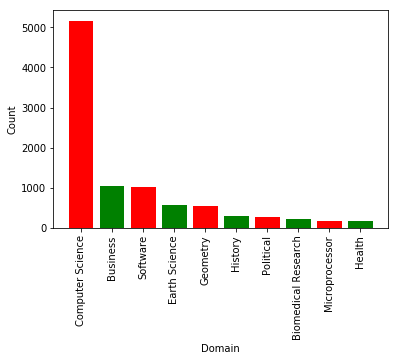

In [74]:
import matplotlib.pyplot as plt_1

x = df1['Domain']
y = df1['Count']
plt_1.bar(x,y, width = 0.8, color = ['red', 'green'])
plt_1.xlabel('Domain')
plt_1.ylabel('Count')
plt_1.xticks(rotation=90);

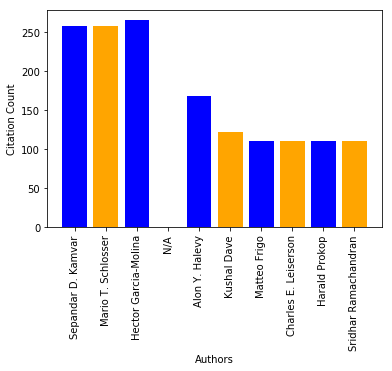

In [75]:
mydf = df_n.head(10)

x = mydf['author_name']
y = mydf['citation_count']
plt_1.bar(x,y, width = 0.8, color = ['blue', 'orange'])
plt_1.xlabel('Authors')
plt_1.ylabel('Citation Count')
plt_1.xticks(rotation=90);

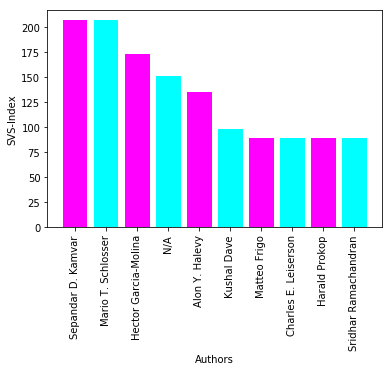

In [76]:
mydf = df_n.head(10)

x = mydf['author_name']
y = mydf['SVS - index']
plt_1.bar(x,y, width = 0.8, color = ['magenta', 'cyan'])
plt_1.xlabel('Authors')
plt_1.ylabel('SVS-Index')
plt_1.xticks(rotation=90);

In [77]:
import warnings
warnings.filterwarnings("ignore")
temp_df = df_new.ix[(df_new['domain'] == 'Computer Science')]
temp_df1 = df_new.ix[(df_new['domain'] == 'Geometry')]
temp_df2 = df_new.ix[(df_new['domain'] == 'Business')]

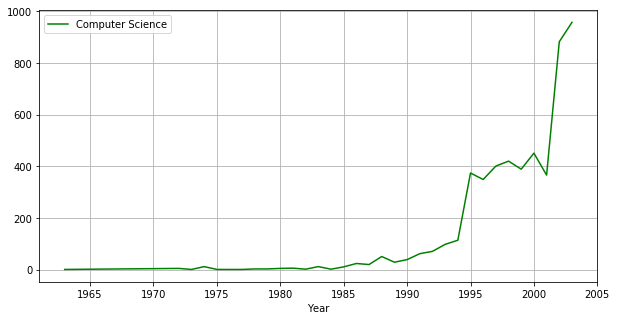

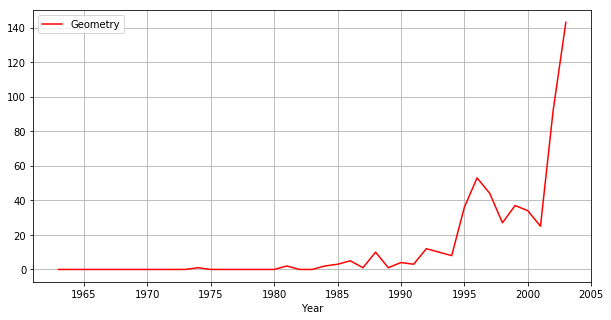

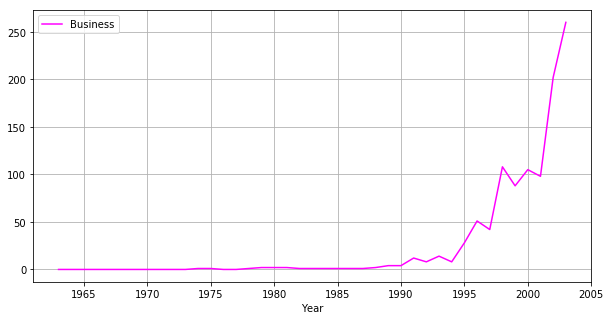

In [78]:
temp_df.plot(x='Year', y=['domain', 'Count'], figsize=(10,5), grid=True, color="green", label=['Computer Science','Computer Science'])
temp_df1.plot(x='Year', y=['domain', 'Count'], figsize=(10,5), grid=True, color="red", label=['Geometry','Geometry'])
temp_df2.plot(x='Year', y=['domain', 'Count'], figsize=(10,5), grid=True, color="magenta", label=['Business','Business'])

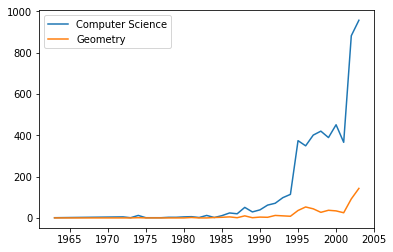

In [79]:
x = temp_df['Year']
y1 = temp_df['Count']
y2 = temp_df1['Count']
plt.plot(x, y1, x, y2)
plt.legend(['Computer Science', 'Geometry'])

# Baseline Model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [81]:
features = ['Abstract', 'paperTitle', 'domain', 'Authors', 'Year', 'citation_count']

In [82]:
cat_cols = ["Authors", "paperTitle", "domain", "Abstract"]

for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

Authors
paperTitle
domain
Abstract


In [83]:
X = train_df[features].values
Y = train_df['reach_score'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [85]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print (linear_regressor.coef_)
y_test_pred = linear_regressor.predict(X_test)

[ 1.73513301e-06 -1.68650447e-06 -1.39947169e-03  1.92758015e-07
 -3.41163194e-02  4.99987591e-01]


In [86]:
root_mean_square_error = np.sqrt(mean_squared_error(y_test,y_test_pred))
root_mean_square_error

0.1487473001505127

In [87]:
linear_regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
test_predictions = linear_regressor.predict(test_df[features])

In [89]:
test_predictions

array([-4.90709040e-01,  5.15712090e+01,  2.85758772e+01,  3.53533670e+00,
       -9.52073560e-01,  1.70436162e+01,  1.39938554e-02,  1.05606505e+00,
       -4.33496667e-01,  1.20145368e+01, -8.90039644e-01,  2.64934983e+01,
        1.72094487e+02,  1.05694914e+01,  1.06567918e+02,  4.65778534e+01,
        2.31481609e+01,  2.71120452e+01,  4.09729420e+00,  1.77580333e+02,
        1.72077046e+02,  3.28200334e-02,  1.60394929e+01,  2.53858319e+00,
        6.01747180e+00,  3.40369808e+01,  1.15200396e+01,  5.52395990e+00,
       -9.53562560e-01,  2.65442686e+01,  4.03252516e+00,  7.50384915e+00,
        1.11026516e-02,  2.20632747e+02,  1.45736406e+01, -9.77209498e-01,
        2.56820787e+00,  1.35759567e+01, -9.22191255e-01, -9.25123513e-01,
        3.56599560e+00,  3.65715786e+01,  1.56398664e+00,  9.03817406e+00,
        4.54023145e+00,  6.03561447e+00,  6.02986853e+00,  1.35240870e+01,
        1.55439673e+01, -9.73314145e-01, -9.62452658e-01,  1.31128005e+02,
        2.53421839e+00, -

In [90]:
test_df

,Authors,index id,paperTitle,Year,Abstract,citation_count,domain,domain_score
0,0,1802.00209v1,3328,2018,5457,1,5,0
1,43,1603.03827v1,8035,2016,2744,105,5,0
2,37,1606.00776v2,6071,2016,5207,59,5,0
3,77,1705.08142v2,5391,2017,2425,9,5,0
4,33,1709.02349v2,192,2017,5238,0,5,0
5,49,1709.08878v1,4358,2017,5421,36,5,0
6,34,1801.06700v1,193,2018,5237,2,5,0
7,13,1609.06492v1,3297,2016,3667,4,18,0
8,59,1610.01076v1,9376,2016,4775,1,5,0
9,83,1705.07962v2,9930,2017,4802,26,18,0


In [91]:
#Make a csv of final predicted results
submission = pd.DataFrame(
    {'key': test_df.paperTitle, 'reach_score': test_predictions},
    columns = ['key', 'reach_score'])
submission.to_csv('submission.csv', index = False)

In [92]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(linear_regressor, random_state=1).fit(X, Y)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
2.0047 ± 0.0240,citation_count
0.0038 ± 0.0002,Year
0.0000 ± 0.0000,domain
0.0000 ± 0.0000,paperTitle
0.0000 ± 0.0000,Abstract
-0.0000 ± 0.0000,Authors


In [93]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=24, max_features=None, max_depth=27, min_samples_split=4,
                              min_samples_leaf=3, random_state=0)
random_forest.fit(X_train, y_train)
y_test_pred_1 = random_forest.predict(X_test)

In [94]:
root_mean_square_error_rf = np.sqrt(mean_squared_error(y_test,y_test_pred_1))
root_mean_square_error_rf

0.19336991124693018

In [95]:
random_forest.fit(X, Y)
test_predictions_rf = random_forest.predict(test_df[features])

#Make a csv of final predicted results
submission = pd.DataFrame(
    {'key': test_df.paperTitle, 'Reach-Score': test_predictions_rf},
    columns = ['key', 'Reach-Score'])
submission.to_csv('submission_rf1.csv', index = False)

In [96]:
test_predictions_rf

array([-5.60720511e-02,  5.87618513e+01,  2.98986549e+01,  3.94337167e+00,
       -5.56072051e-01,  1.77673386e+01,  4.43927949e-01,  1.37394336e+00,
       -5.60720511e-02,  1.25936302e+01, -5.56072051e-01,  2.63652758e+01,
        8.16738815e+01,  1.09390684e+01,  8.16738815e+01,  4.85614339e+01,
        2.32885750e+01,  2.66315704e+01,  4.41926153e+00,  8.16738815e+01,
        8.16738815e+01,  4.43927949e-01,  1.66053888e+01,  2.93552643e+00,
        6.42414756e+00,  3.54302853e+01,  1.19995908e+01,  5.92564588e+00,
       -5.56072051e-01,  2.64941142e+01,  4.44433064e+00,  7.93089754e+00,
        4.43927949e-01,  8.16738815e+01,  1.48935535e+01, -6.33967821e-01,
        2.94209714e+00,  1.39944756e+01, -5.56072051e-01, -5.56072051e-01,
        3.92598246e+00,  3.61730630e+01,  1.93403247e+00,  9.45983062e+00,
        4.90887933e+00,  6.43916189e+00,  6.43883364e+00,  1.40084040e+01,
        1.59786832e+01, -5.56072051e-01, -5.56072051e-01,  8.16738815e+01,
        2.92372531e+00, -

In [97]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(random_forest, random_state=1).fit(X, Y)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
1.9544 ± 0.0216,citation_count
0.0063 ± 0.0001,Year
0.0006 ± 0.0000,domain
0.0000 ± 0.0000,Authors
0.0000 ± 0.0000,paperTitle
0.0000 ± 0.0000,Abstract


# Advanced Model

In [98]:
test_X = test_df[features]
import lightgbm as lgb
#Train and run the lgb model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression", "metric" : "rmse", "num_leaves" : 30,
        "min_child_samples" : 100, "learning_rate" : 0.1, "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5, "bagging_frequency" : 5, "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

X_train, X_test, y_train, y_test
pred_test, model, pred_val = run_lgb(X_train, y_train, X_test, y_test, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.40951
Early stopping, best iteration is:
[89]	valid_0's rmse: 1.40822


In [99]:
#Make a csv of final predicted results
submission = pd.DataFrame(
    {'key': test_df.paperTitle, 'Reach-Score': pred_test},
    columns = ['key', 'Reach-Score'])
submission.to_csv('advanced_lgb.csv', index = False)

In [103]:
test_df = test_df.sort_values(by='citation_count', ascending=False)
test_df.head(10)

,Authors,index id,paperTitle,Year,Abstract,citation_count,domain,domain_score
33,54,1502.08029v5,3013,2015,2750,443,5,0
63,31,1507.04808v3,2169,2015,5226,433,5,0
19,42,1605.09782v7,1248,2016,3237,357,17,0
20,93,1606.03490v3,8877,2016,3022,346,10,0
12,9,1604.00289v3,2173,2016,2748,346,5,0
64,17,1508.04395v2,3658,2015,2274,338,3,0
67,81,1509.06664v4,7476,2015,5650,329,5,0
51,30,1511.05234v2,1825,2015,4902,264,5,0
14,80,1604.06057v2,4562,2016,2190,215,15,0
62,71,1506.08909v3,8959,2015,4346,206,5,0
